### Analizando resultados parámetros por pareja

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

sns.set()

In [2]:
df_MB = pd.read_csv('../Data/MBiases_simulated.csv')
df_WS = pd.read_csv('../Data/WSLS_simulated.csv')
df_FR = pd.read_csv('../Data/FRA_simulated.csv')

In [3]:
df_MB['Model'] = 'MBiases'
df_WS['Model'] = 'WSLS'
df_FR['Model'] = 'FRA'
df = pd.concat([df_MB, df_WS, df_FR])
df.head(2)

,Dyad,Round,Player,Answer,Time,a11,a12,a13,a14,a15,...,Similarity,Score_LAG1,Norm_Score_LAG1,Consistency_LEAD1,Dif_consist_LAG1,Category_LAG1,RegionGo,RegionGo2,Similarity_LAG1,Model
0,1000847786,1,100081,Absent,6,0,1,1,0,0,...,0.40625,NaN,NaN,0.170732,NaN,NaN,RS,RS,NaN,MBiases
1,1000847786,2,100081,Present,22,1,0,0,0,0,...,0.34375,29.0,0.98125,0.230769,NaN,RS,RS,IN,0.40625,MBiases


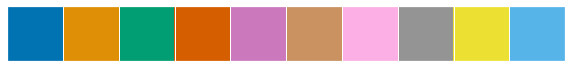

In [4]:
paleta = sns.color_palette('colorblind')
sns.palplot(paleta)
colores = {'WSLS':paleta[9], 'FRA':paleta[1], 'MBiases':paleta[5]}

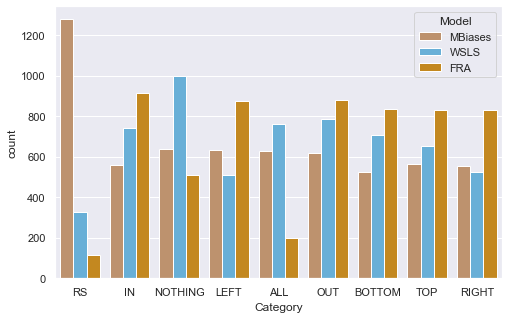

In [5]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.countplot('Category', hue='Model', data=df, palette=colores)
plt.show()

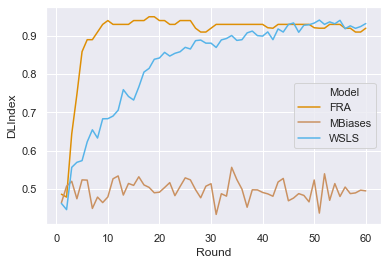

In [6]:
aux = df.groupby(['Model', 'Round'])['DLIndex'].mean().reset_index()
ax = sns.lineplot(x='Round', y='DLIndex', hue='Model', data=aux, palette=colores)
plt.show()

In [7]:
df.groupby('Model')['Joint'].value_counts()

Model  Joint
FRA    0        5560
       18        102
       16         98
       14         42
       32         40
                ... 
WSLS   27          4
       22          2
       26          2
       29          2
       33          2
Name: Joint, Length: 87, dtype: int64

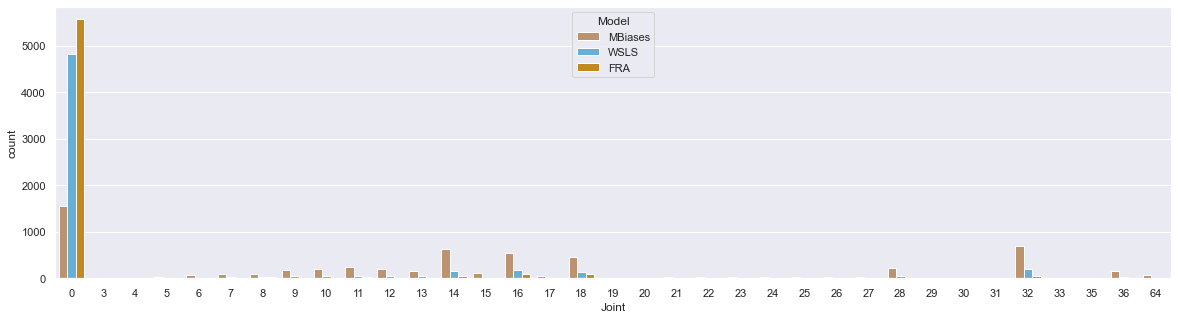

In [8]:
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot('Joint', hue='Model', data=df, palette=colores)
plt.show()

In [ ]:
from FRA import FRASim

cols = ['a' + str(i+1) + str(j+1) for i in range(8) for j in range(8)]

for dyad, grp in df.groupby(['Dyad', 'Round']):
    players = grp.Player.unique()
    pl1 = grp[grp['Player']==players[0]]
    pl2 = grp[grp['Player']==players[1]]
    region1 = pl1[cols].apply(lambda x: list(x), axis=1)
    region2 = pl2[cols].apply(lambda x: list(x), axis=1)
    overlap = np.multiply(region1, region2)
    print(overlap)

#df['overlap'] = df.apply(lambda x: find_overlap(x), axis=1)

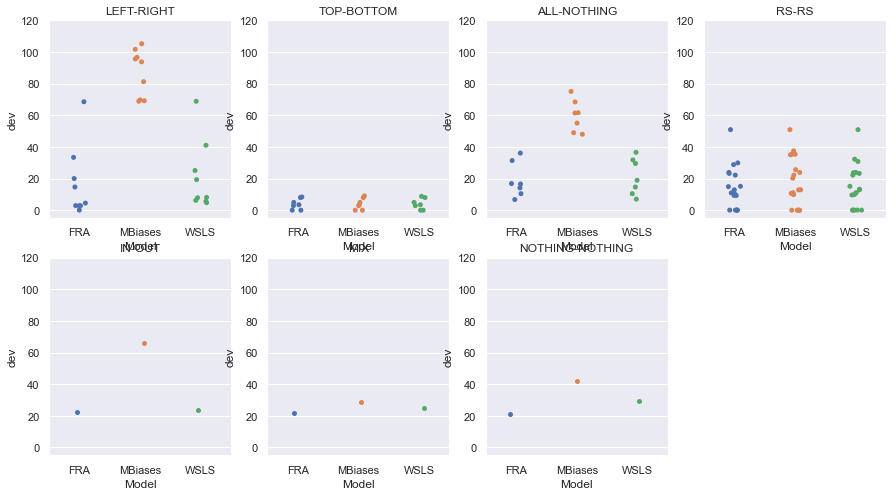

In [162]:
fig = plt.figure(figsize=(15,8))
split = df_fitted['DL'].unique()
for i, sp in enumerate(split):
    df = df_fitted[df_fitted['DL']==sp].sort_values(by='Model')
    plt.subplot(2,4,i+1)
    ax = sns.stripplot(x='Model', y='dev', data=df)
    ax.set_ylim([-5,120])
    plt.xlabel('Model')
    plt.ylabel('dev')
    plt.title(sp)
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


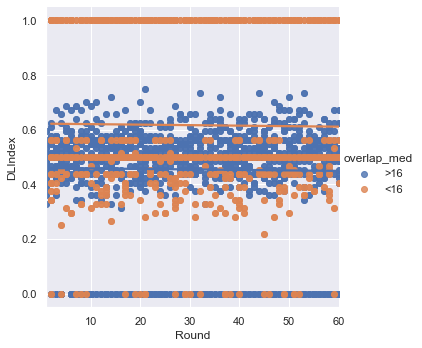

In [13]:
df_MB['overlap_med'] = df_MB.Joint > 16
df_MB['overlap_med'] = np.where(df_MB.Joint == False, '<16', '>16')
sns.lmplot(x='Round', y='DLIndex', 
           hue='overlap_med', data=df_MB,
          ci=None, size=5)

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


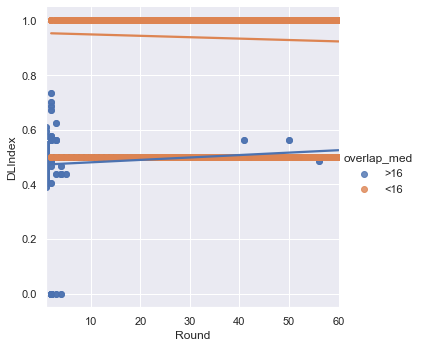

In [12]:
df_FR['overlap_med'] = df_FR.Joint > 16
df_FR['overlap_med'] = np.where(df_FR.Joint == False, '<16', '>16')
sns.lmplot(x='Round', y='DLIndex', 
           hue='overlap_med', data=df_FR,
          ci=None, size=5)